In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

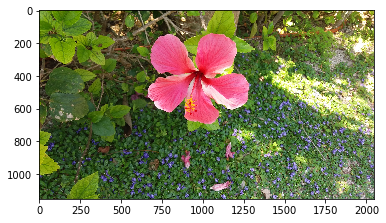

In [2]:
img = cv2.imread("data/flower.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
# 이미지 읽어 들이고 크기 변경하기 --- (*1)
img = cv2.resize(img, (300, 169))

In [4]:
# 색공간 변경하기 --- (*2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0) 
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

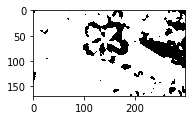

In [5]:
# 화면 왼쪽에 변환한 이미지 출력하기 --- (*3)
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

In [6]:
# 윤곽 검출하기 --- (*4)
cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[1]

In [7]:
# 검출한 윤곽 그리기 --- (*5)
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 너무 크거나 너무 작은 부분 제거하기
    if w < 30 or w > 200: continue
    print(x,y,w,h) # 결과 출력하기
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

error: OpenCV(4.1.1) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/shapedescr.cpp:743: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'pointSetBoundingRect'


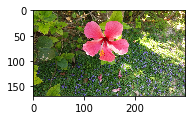

In [8]:
# 화면 오른쪽에 결과 출력하기
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("data/obj1.png", dpi=200)